# <center> Predicting Yield using Regression  </center>



| Feature | Description |
| --- | --- |
| farm_id | id given to the farms|
| farm_area |  Area of the farm |
| farming_company  | Name of the farming company |
| deidentified_location  | location number assigned to the company |
| date/timestamp | Timestamp value |
| ingredient_type | ing_w, ing_x, ing_y, ing_z |
| temp_obs  | observed temperature of that location |
| cloudiness | cloud cover in that location |
| wind_direction | Direction of wind of that location |
| dew_temp | dew temperature of that location |
| pressure_sea_level | Atmospheric pressure of the location |
| wind_speed | Speed of the wind on that location |
| num_processing_plants | Number of processing plant. |
| operations_commencing_year  | year in which the company was started |
| yield | the amount of prodcution of different igredient types|


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("/content/drive/My Drive/CSV/train_phd.csv")

In [4]:
df.head()

,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,yield,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,690.455096,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.0,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0
1,fid_90053,252.696160,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.0,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0
2,fid_17537,499.446528,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.0,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0
3,fid_110392,2200.407555,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.0,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0
4,fid_62402,10833.140121,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.0,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0


In [0]:
pd.options.display.float_format = '{:.2f}'.format


In [6]:
df.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'date', 'ingredient_type', 'yield', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [0]:
df[['temp_obs', 'cloudiness', 'wind_direction']].describe()


,temp_obs,cloudiness,wind_direction
count,20511532.00,20511532.00,20511532.00
mean,15.98,2.71,170.99
std,10.94,2.87,114.05
min,-28.90,0.00,0.00
25%,8.60,0.00,70.00
50%,16.70,2.00,170.00
75%,23.90,4.00,270.00
max,47.20,9.00,360.00


In [0]:
df[['dew_temp', 'pressure_sea_level', 'precipitation']].describe()


,dew_temp,pressure_sea_level,precipitation
count,20511532.00,20511532.00,20511532.00
mean,7.74,1015.96,1.22
std,10.17,6.93,8.80
min,-35.00,968.20,-1.00
25%,0.00,1011.80,0.00
50%,8.90,1015.70,0.00
75%,16.00,1020.30,0.00
max,26.10,1045.50,343.00


In [0]:
df[['wind_speed', 'farm_area']].describe()


,wind_speed,farm_area
count,20511532.00,20511532.00
mean,3.38,9944.73
std,2.27,10856.29
min,0.00,26.29
25%,2.10,2992.03
50%,3.10,6683.07
75%,4.60,12802.59
max,19.00,81290.12


In [0]:
df[ 'pressure_sea_level'].value_counts()

1013.60    936757
1012.40    130360
1015.20    129784
1016.20    128332
1017.70    127437
            ...  
974.80         36
968.20         36
969.40         36
972.90         36
971.60         36
Name: pressure_sea_level, Length: 709, dtype: int64

# Playing with Correlation:

In [0]:
df[['yield', 'wind_speed']].corr()


,yield,wind_speed
yield,1.00,0.01
wind_speed,0.01,1.00


In [7]:
df[['yield', 'precipitation']].corr()


,yield,precipitation
yield,1.00,-0.00
precipitation,-0.00,1.00


In [0]:
print('# of observations : ', df[df['precipitation']< 10].shape[0])

df1 = df[df['precipitation']< 10]

df1[['yield', 'precipitation']].corr()


# of observations :  19888487


,yield,precipitation
yield,1.00,-0.00
precipitation,-0.00,1.00


In [0]:
import seaborn as sns



In [0]:
corr_matrix=df.corr()


In [0]:
import matplotlib.pyplot as plt


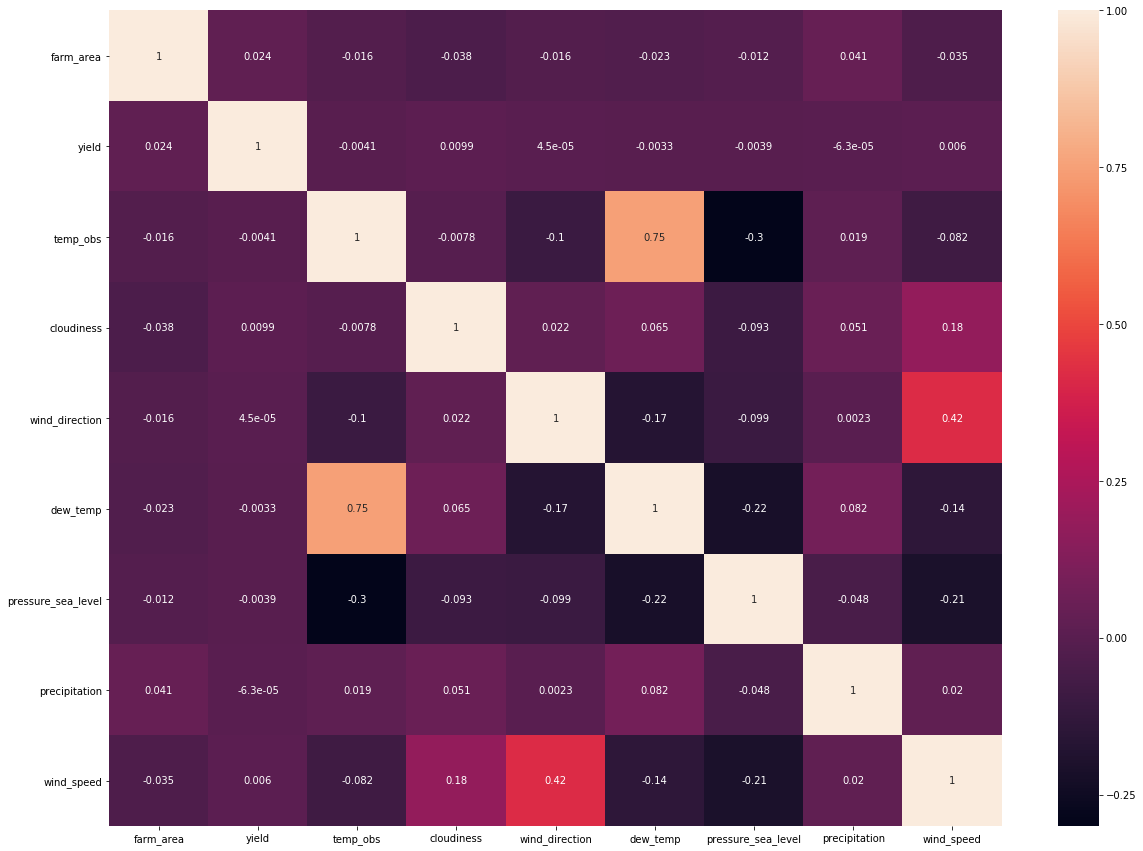

In [12]:
plt.subplots(figsize=(20,15))

sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10})


In [16]:
df['wind_speed'].describe()

count   20511532.00
mean           3.38
std            2.27
min            0.00
25%            2.10
50%            3.10
75%            4.60
max           19.00
Name: wind_speed, dtype: float64

In [13]:
df['cloudiness'].describe()

count   20511532.00
mean           2.71
std            2.87
min            0.00
25%            0.00
50%            2.00
75%            4.00
max            9.00
Name: cloudiness, dtype: float64

In [14]:
df['cloudiness'].value_counts()

0.00    8500191
4.00    3751736
2.00    3581211
8.00    2195597
6.00    1930236
9.00     354435
7.00     129616
1.00      26440
3.00      22511
5.00      19559
Name: cloudiness, dtype: int64

# BINNING:

In [17]:
bins = [0,2,4,6,8,10]
grp = ["C1","C2","C3","C4", "C5"]
df["cloudiness_cat"] = pd.cut(df["cloudiness"],bins,labels= grp,include_lowest=True)
df.head()


,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,yield,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,cloudiness_cat
0,fid_110884,690.46,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3
1,fid_90053,252.70,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3
2,fid_17537,499.45,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3
3,fid_110392,2200.41,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3
4,fid_62402,10833.14,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3


In [18]:
bins = [0,5,10,15,20]
grp = ["W1","W2","W3","W4",]
df["wind_speed_cat"] = pd.cut(df["wind_speed"],bins,labels= grp,include_lowest=True)
df.head()

,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,yield,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,cloudiness_cat,wind_speed_cat
0,fid_110884,690.46,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3,W1
1,fid_90053,252.70,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3,W1
2,fid_17537,499.45,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3,W1
3,fid_110392,2200.41,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3,W1
4,fid_62402,10833.14,Obery Farms,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,6.00,0.00,20.00,1019.70,-1.00,0.00,C3,W1


In [19]:
df.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'date', 'ingredient_type', 'yield', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed', 'cloudiness_cat', 'wind_speed_cat'],
      dtype='object')

# Deleting the Columns:

In [0]:
del df['farming_company']
del df['cloudiness']
del df['wind_speed']
del df['pressure_sea_level']
del df['dew_temp']
del df['wind_direction']

In [0]:
df.head()

,farm_id,farm_area,deidentified_location,date,ingredient_type,yield,temp_obs,precipitation,cloudiness_cat,wind_speed_cat
0,fid_110884,690.46,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,-1.00,C3,W1
1,fid_90053,252.70,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,-1.00,C3,W1
2,fid_17537,499.45,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,-1.00,C3,W1
3,fid_110392,2200.41,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,-1.00,C3,W1
4,fid_62402,10833.14,location 7369,2016-01-01 00:00:00,ing_w,0.00,25.00,-1.00,C3,W1


In [0]:
cat_cols = ['farm_id',  'deidentified_location', 'ingredient_type', 'cloudiness_cat','wind_speed_cat' ]

In [22]:
num_cols = df.columns[~df.columns.isin(cat_cols)]
num_cols = num_cols.drop('yield')
num_cols

Index(['farm_area', 'date', 'temp_obs', 'precipitation'], dtype='object')

In [0]:
df.set_index("date", inplace = True) 


## Changing the dtypes:

In [24]:
for col in['farm_id',  'deidentified_location', 'ingredient_type', 'cloudiness_cat','wind_speed_cat']:
    df[col]= df[col].astype('category') 
df.dtypes


farm_id                  category
farm_area                 float64
deidentified_location    category
ingredient_type          category
yield                     float64
temp_obs                  float64
precipitation             float64
cloudiness_cat           category
wind_speed_cat           category
dtype: object

# Dependent & Independent: 

In [0]:
X = df.drop('yield',  axis = 1)
y = df["yield"]

# Train-Test-Split:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 123)

# One Hot Encoding:

In [0]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown = 'ignore')
X_train = one.fit_transform(X_train[cat_cols])
X_test = one.transform(X_test[cat_cols])

# Model Evaluation:

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def model_evaluation(actuals, predictions):
    print('RMSE, MAE :')
    rms = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rms, mae


# 1. LightGBM:

In [0]:
import lightgbm as lgb


In [0]:
lg = lgb.LGBMRegressor()

In [0]:
lg.fit(X_train, y_train)
pred_train_lg = lg.predict(X_train)
pred_test_lg = lg.predict(X_test)

In [42]:
model_evaluation(y_train , pred_train_lg)


RMSE, MAE :


(128974.36610291134, 2503.571154596569)

In [0]:
LG_RMSE, LG_MAE = model_evaluation(y_test , pred_test_lg)


RMSE, MAE :


# 2. AdaBoost:

In [0]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()


In [0]:
ad.fit(X_train, y_train)
pred_train_ad = ad.predict(X_train)
pred_test_ad = ad.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_ad)


RMSE, MAE :


(129830.19461220579, 2750.0211554854222)

In [0]:
AD_RMSE, AD_MAE = model_evaluation(y_test , pred_test_ad)


RMSE, MAE :


# 3. XGBoost:

In [0]:
import xgboost as xgb
xg = xgb.XGBRegressor()

In [0]:
xg.fit(X_train, y_train)
pred_train_xg = xg.predict(X_train)
pred_test_xg = xg.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_xg)


RMSE, MAE :


(129075.32255237561, 2621.865139594111)

In [0]:
XG_RMSE, XG_MAE= model_evaluation(y_test , pred_test_xg)

RMSE, MAE :


# 4. CatBoost:

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor()

In [0]:
cb.fit(X_train, y_train)
pred_train_cb = cb.predict(X_train)
pred_test_cb = cb.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_cb)



RMSE, MAE :


(128973.25830061051, 2519.223619187128)

In [0]:
CT_RMSE, CT_MAE= model_evaluation(y_test , pred_test_cb)


RMSE, MAE :


# 5. GradientBoosting:

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gbm = GradientBoostingRegressor()

In [0]:
gbm.fit(X_train, y_train)
pred_train_gbm = gbm.predict(X_train)
pred_test_gbm = gbm.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_gbm)


RMSE, MAE :


(129077.73611138825, 2622.237857401635)

In [0]:
GB_RMSE, GB_MAE= model_evaluation(y_test , pred_test_gbm)


RMSE, MAE :


# 6. Decision Tree:

In [0]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [0]:
dtr.fit(X_train, y_train)
pred_train_dtr = dtr.predict(X_train)
pred_test_dtr = dtr.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_dtr)


RMSE, MAE :


(128969.03617044167, 2407.1096090270094)

In [0]:
DTR_RMSE, DTR_MAE = model_evaluation(y_test , pred_test_dtr)


RMSE, MAE :


# 7. Linear Regression:

In [0]:
from sklearn import linear_model 
reg = linear_model.LinearRegression() 


In [0]:
reg.fit(X_train, y_train)
pred_train_lr = reg.predict(X_train)
pred_test_lr = reg.predict(X_test)

In [0]:
model_evaluation(y_train , pred_train_lr)


RMSE, MAE :


(141806.2464364133, 5104.627126564812)

In [0]:
LR_RMSE, LR_MAE = model_evaluation(y_test , pred_test_lr)


RMSE, MAE :


In [0]:
DTR = [DTR_RMSE, DTR_MAE]
LR = [LR_RMSE, LR_MAE]
AD = [AD_RMSE, AD_MAE]
XG = [XG_RMSE, XG_MAE]
GBM = [GB_RMSE, GB_MAE]
LGB = [LG_RMSE, LG_MAE]
CAT = [CT_RMSE, CT_MAE]

In [0]:
Model = pd.DataFrame([LR, AD, XG, DTR, GBM, LGB, CAT], columns = ['RMSE', 'MAE'], index = ['Liner', 'AdaBoost', 'XGBoost', 'Decision Tree', 'GradientBoosting', 'LightGB', 'CatBoost'])

In [0]:
Model

,RMSE,MAE
Liner,140720.42,5081.29
AdaBoost,128766.41,2727.89
XGBoost,127763.13,2592.31
Decision Tree,127801.53,2380.44
GradientBoosting,127771.80,2592.73
LightGB,127807.11,2476.63
CatBoost,127797.10,2492.26


These are not the actual RMSE I got during model building.
So ill tell which were the best model depending on their rmse values that i got.
1. LightGBM
2. CatBoost
3. Neural Network (ANN)
4. XgBoost
5. AdaBoost
6. GBM
7. Decision Tree
8. Linear Regression

Linear Regression was giving negative yield during Predictions.
Below i have shown ANN model .

# Same PreProcessing For test data:

In [0]:
test =pd.read_csv("/content/drive/My Drive/CSV/phd_test (1).csv")

In [33]:
bins = [0,2,4,6,8,10]
grp = ["C1","C2","C3","C4", "C5"]
test["cloudiness_cat"] = pd.cut(test["cloudiness"],bins,labels= grp,include_lowest=True)
test.head()

,Unnamed: 0,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,cloudiness_cat
0,0,fid_110884,690.46,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,0,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2
1,1,fid_90053,252.70,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,1,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2
2,2,fid_17537,499.45,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,2,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2
3,3,fid_110392,2200.41,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,3,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2
4,4,fid_62402,10833.14,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,4,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2


In [34]:
bins = [0,5,10,15,20]
grp = ["W1","W2","W3","W4",]
test["wind_speed_cat"] = pd.cut(test["wind_speed"],bins,labels= grp,include_lowest=True)
test.head()

,Unnamed: 0,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,cloudiness_cat,wind_speed_cat
0,0,fid_110884,690.46,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,0,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2,W1
1,1,fid_90053,252.70,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,1,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2,W1
2,2,fid_17537,499.45,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,2,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2,W1
3,3,fid_110392,2200.41,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,3,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2,W1
4,4,fid_62402,10833.14,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,4,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,C2,W1


In [0]:
test.set_index("date", inplace = True) 


In [0]:
del test['dew_temp']
del test['wind_direction']
del test['farming_company']
del test['cloudiness']
del test['wind_speed']
del test['pressure_sea_level']
del test['Unnamed: 0']

In [0]:
cat_cols = ['farm_id', 'deidentified_location', 'ingredient_type','wind_speed_cat', 'cloudiness_cat' ]

In [0]:
num_cols = df.columns[~df.columns.isin(cat_cols)]

In [39]:
for col in['farm_id', 'deidentified_location', 'ingredient_type','wind_speed_cat', 'cloudiness_cat']:
    test[col]= test[col].astype('category') 
test.dtypes


farm_id                  category
farm_area                 float64
deidentified_location    category
ingredient_type          category
id                          int64
temp_obs                  float64
precipitation             float64
cloudiness_cat           category
wind_speed_cat           category
dtype: object

In [0]:
test.isnull().sum()

Unnamed: 0                  0
farm_id                     0
farm_area                   0
deidentified_location       0
ingredient_type             0
id                          0
temp_obs                    0
precipitation               0
cloudiness_cat              0
wind_speed_cat           1079
dtype: int64

In [0]:
test = test.fillna(method = 'ffill').fillna(method = 'bfill')


In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
test = ohe.fit_transform(test[cat_cols])

In [0]:
ad_pred = ad.predict(test)

In [0]:
xg_pred = xg.predict(test)

In [0]:
cat_pred = cb.predict(test)

In [0]:
gbm_pred = gbm.predict(test)

In [0]:
dtr_pred = dtr.predict(test)

In [0]:
reg_pred = reg.predict(test)

In [44]:
test

,farm_id,farm_area,deidentified_location,ingredient_type,id,temp_obs,precipitation,cloudiness_cat,wind_speed_cat
date,,,,,,,,,
2017-01-01 00:00:00,fid_110884,690.46,location 7369,ing_w,0,17.80,0.00,C2,W1
2017-01-01 00:00:00,fid_90053,252.70,location 7369,ing_w,1,17.80,0.00,C2,W1
2017-01-01 00:00:00,fid_17537,499.45,location 7369,ing_w,2,17.80,0.00,C2,W1
2017-01-01 00:00:00,fid_110392,2200.41,location 7369,ing_w,3,17.80,0.00,C2,W1
2017-01-01 00:00:00,fid_62402,10833.14,location 7369,ing_w,4,17.80,0.00,C2,W1
...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,fid_58769,8659.12,location 868,ing_x,26001715,-21.10,2.00,C1,W1
2017-12-31 23:00:00,fid_58769,8659.12,location 868,ing_z,26001716,-21.10,2.00,C1,W1
2017-12-31 23:00:00,fid_117010,11857.40,location 868,ing_w,26001717,-21.10,2.00,C1,W1


In [0]:
lg_pred = lg.predict(test)

In [0]:
lg_pred = pd.DataFrame(lg_pred, columns = ['yield'])

In [51]:
lg_pred

,yield
0,176.97
1,176.97
2,176.97
3,176.97
4,395.33
...,...
21154792,266.14
21154793,228.17
21154794,116.11
21154795,266.14


In [0]:
lg_pred.to_csv('/content/drive/My Drive/CSV/finalSUb.csv')

In [0]:
test =pd.read_csv("/content/drive/My Drive/CSV/phd_test (1).csv")

In [0]:
test = pd.concat([test, lg_pred], axis=1 )

In [60]:
test

,Unnamed: 0,farm_id,farm_area,farming_company,deidentified_location,date,ingredient_type,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,yield
0,0,fid_110884,690.46,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,0,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,176.97
1,1,fid_90053,252.70,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,1,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,176.97
2,2,fid_17537,499.45,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,2,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,176.97
3,3,fid_110392,2200.41,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,3,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,176.97
4,4,fid_62402,10833.14,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,4,17.80,4.00,100.00,11.70,1021.40,0.00,3.60,395.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154792,21154792,fid_58769,8659.12,Obery Farms,location 868,2017-12-31 23:00:00,ing_x,26001715,-21.10,0.00,270.00,-26.80,1029.80,2.00,4.60,266.14
21154793,21154793,fid_58769,8659.12,Obery Farms,location 868,2017-12-31 23:00:00,ing_z,26001716,-21.10,0.00,270.00,-26.80,1029.80,2.00,4.60,228.17
21154794,21154794,fid_117010,11857.40,Obery Farms,location 868,2017-12-31 23:00:00,ing_w,26001717,-21.10,0.00,270.00,-26.80,1029.80,2.00,4.60,116.11
21154795,21154795,fid_117010,11857.40,Obery Farms,location 868,2017-12-31 23:00:00,ing_x,26001718,-21.10,0.00,270.00,-26.80,1029.80,2.00,4.60,266.14


In [0]:
from datetime import datetime

# Extracting the month column:

In [0]:
test['Month'] = pd.DatetimeIndex(test['date']).month 


# GroupBY:

In [71]:
test_gb= test.groupby(['Month', 'ingredient_type'], as_index=False).sum()
test_gb.head()

,Month,ingredient_type,Unnamed: 0,farm_area,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,yield
0,1,ing_w,9232386329383,9131660316.32,17472008355098,6836250.40,4001837.00,194392089.00,1217542.90,1089281375.60,743397.00,3870308.40,177405517.36
1,1,ing_x,3956366759768,4302923530.78,7900234670791,1964017.90,1120825.00,65815243.00,-300973.30,381615748.10,254707.00,1167926.00,230425461.40
2,1,ing_y,2940691776459,3109251806.14,6491420252296,558456.20,645897.00,45613614.00,-700872.70,246518474.40,160371.00,809871.00,2539758169.89
3,1,ing_z,1202005440998,1157377252.68,1943366720957,611994.20,331619.00,18279146.00,-60501.50,111479842.10,82840.00,314683.10,45978976.39
4,2,ing_w,8499472782851,8267309705.61,15933099306668,9127016.30,2924344.00,180678580.00,2421200.70,982583549.40,437376.00,3817306.90,161520332.79


# For Ingredient_type:

In [72]:
test_gb[test_gb['ingredient_type']== 'ing_w']

,Month,ingredient_type,Unnamed: 0,farm_area,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,yield
0,1,ing_w,9232386329383,9131660316.32,17472008355098,6836250.40,4001837.00,194392089.00,1217542.90,1089281375.60,743397.00,3870308.40,177405517.36
4,2,ing_w,8499472782851,8267309705.61,15933099306668,9127016.30,2924344.00,180678580.00,2421200.70,982583549.40,437376.00,3817306.90,161520332.79
8,3,ing_w,9558466961811,9118663775.90,17804467123723,11250918.40,3502668.00,193803969.00,2208886.00,1091722774.40,540078.00,4605260.70,180543458.75
12,4,ing_w,9426225564501,8851102342.51,17396456865815,16823386.70,3232160.00,186930416.00,7396117.10,1053328794.50,712719.00,4032598.60,177376425.90
16,5,ing_w,9918324302906,9159579185.48,18153743345548,20040227.80,3348302.00,185186763.00,10792895.60,1085854289.70,1131901.00,4154843.90,181740987.31
20,6,ing_w,9663204982459,8801972220.20,17441847535267,24281652.10,3022789.00,193478600.00,14700208.70,1042931351.10,885309.00,3781420.10,168532241.13
24,7,ing_w,10262801027946,9166550505.55,18507865060498,27002508.80,3354105.00,185767810.00,18909419.80,1088688294.20,2187112.00,3441277.40,174866105.03
28,8,ing_w,10423520454750,9152557734.86,18660563815504,25376280.20,3330629.00,185188530.00,17881304.80,1087896816.50,1483347.00,3389793.80,178155315.61
32,9,ing_w,10250050937523,8860375124.44,18215525150607,22491582.10,2908405.00,178567800.00,15305003.80,1052848403.60,1136019.00,3416511.80,169076361.38
36,10,ing_w,10771881686489,9166118729.20,19005730429171,18888933.90,2833998.00,180321540.00,10954852.20,1090895219.50,1167455.00,3821562.10,179793837.88


In [0]:
test_gb.drop(['Unnamed: 0','farm_area','id','temp_obs','cloudiness','wind_direction','dew_temp','pressure_sea_level','precipitation', 'wind_speed'], axis=1, inplace=True)

In [0]:
strategy = test_gb[test_gb['ingredient_type']== 'ing_w' ]

In [0]:
demand = [90430481, 75344853, 91917783, 82591524, 87419669, 297500000, 198900000, 97367031, 91049286, 91755300, 86533266, 88514610]

In [87]:
strategy

,Month,ingredient_type,yield
0,1,ing_w,177405517.36
4,2,ing_w,161520332.79
8,3,ing_w,180543458.75
12,4,ing_w,177376425.90
16,5,ing_w,181740987.31
20,6,ing_w,168532241.13
24,7,ing_w,174866105.03
28,8,ing_w,178155315.61
32,9,ing_w,169076361.38
36,10,ing_w,179793837.88


In [89]:
strategy['demand']= demand

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
strategy = strategy.assign(demand = [90430481, 75344853, 91917783, 82591524, 87419669, 297500000, 198900000, 97367031, 91049286, 91755300, 86533266, 88514610])


In [92]:
strategy

,Month,ingredient_type,yield,demand
0,1,ing_w,177405517.36,90430481
4,2,ing_w,161520332.79,75344853
8,3,ing_w,180543458.75,91917783
12,4,ing_w,177376425.90,82591524
16,5,ing_w,181740987.31,87419669
20,6,ing_w,168532241.13,297500000
24,7,ing_w,174866105.03,198900000
28,8,ing_w,178155315.61,97367031
32,9,ing_w,169076361.38,91049286
36,10,ing_w,179793837.88,91755300


In [0]:
strategy['Excess'] = strategy.apply(lambda x: x['yield'] - x['demand'], axis=1)

In [98]:
strategy

,Month,ingredient_type,yield,demand,Shortage,Excess
0,1,ing_w,177405517.36,90430481,86975036.36,86975036.36
4,2,ing_w,161520332.79,75344853,86175479.79,86175479.79
8,3,ing_w,180543458.75,91917783,88625675.75,88625675.75
12,4,ing_w,177376425.90,82591524,94784901.90,94784901.90
16,5,ing_w,181740987.31,87419669,94321318.31,94321318.31
20,6,ing_w,168532241.13,297500000,-128967758.87,-128967758.87
24,7,ing_w,174866105.03,198900000,-24033894.97,-24033894.97
28,8,ing_w,178155315.61,97367031,80788284.61,80788284.61
32,9,ing_w,169076361.38,91049286,78027075.38,78027075.38
36,10,ing_w,179793837.88,91755300,88038537.88,88038537.88




> The major observation i am getting with this model is June & july will fail to match the demand as per our predicted yield.

> Rest of the month we have excess of supply.

> So we can lower down the production depending upon the excess we are getting for rest of the months.

> And increase the yield in June & July.



In [0]:
sub = xg_pred.head(999999)

In [0]:
sub.to_csv('/content/drive/My Drive/CSV/5thSubmission(LGB).csv')

# ANN Model:

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.5))
# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.3))

NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
NN_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               187392    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        


In [0]:
NN_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split = 0.2)




Train on 11486457 samples, validate on 2871615 samples
Epoch 1/10





11486457/11486457 [==============================] - 1127s 98us/step - loss: 17889393457.7391 - mean_squared_error: 17889393457.7391 - val_loss: 17196665862.3596 - val_mean_squared_error: 17196665862.3596
Epoch 2/10
11486457/11486457 [==============================] - 1123s 98us/step - loss: 16735159111.2648 - mean_squared_error: 16735159111.2648 - val_loss: 17062200706.0806 - val_mean_squared_error: 17062200706.0806
Epoch 3/10
11486457/11486457 [==============================] - 1136s 99us/step - loss: 16726181871.2399 - mean_squared_error: 16726181871.2399 - val_loss: 17045341083.7164 - val_mean_squared_error: 17045341083.7164
Epoch 4/10
11486457/11486457 [==============================] - 1162s 101us/step - loss: 16703385067.8755 - mean_squared_error: 16703385067.8755 - val_loss: 17058610437.4059 - val_mean_squared_error: 17058610437.4059
Epoch 5/10
11486457/11486457 [==============================] - 1151s 10

In [0]:
ann_preds = NN_model.predict(test)

In [0]:
ann_preds

In [0]:
ann_preds = pd.DataFrame(ann_pred, columns = ['yield'])

In [0]:
sub = ann_preds.head(999999)

In [0]:
sub.to_csv('6thSubmission(ann).csv')